In [1]:
import fastai


In [2]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


In [ ]:
!pip install fastai --upgrade

In [5]:
from fastai.tabular.all import *


In [6]:
# Goal of the below models is to build a classifier that can accurately predict the "Group the patient belongs to given the features"
# The following reads the CSV file, classifier has to find the group to which the patient data belongs to
# "GROUP" is the column to be predicted, also called dependent variable

In [8]:
import pandas as pd

In [21]:
df = pd.read_csv('temp_train_data.csv',header=0)

In [22]:
df.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,PASP,RWT,CONCENTRIC,MR,AR,TR,PAH,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SBP,DBP,HR,DOE I-II,DOE III - IV,FEVER,COLD & COUGH,SORE THROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDEMA,sST2,GROUP
0,1,M,3.2,2.5,4.6,3.0,1.1,1.2,0.8,1.0,65,35,44,62,18,36.0,0.59,NIL,MILD,NIL,MILD,MILD,NIL,NIL,400,13,0,12.3,12.5,256000,53.6,4.3,0.0,23.6,7.1,141,4.1,120,70,112,NO,YES,YES,YES,YES,NO,NO,YES,NO,NO,14.0,PHARYNGITIS
1,10,M,3.0,2.5,4.4,2.4,1.0,1.3,1.0,1.5,63,33,67,89,21,34.0,0.45,NIL,NIL,TRIVIAL,TRIVIAL,NIL,NIL,NIL,400,19,0,12.7,12.9,265000,43.5,1.3,0.9,26.0,2.5,139,3.5,120,60,65,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,6.5,PHARYNGITIS
2,4,M,3.4,2.7,4.3,2.8,1.0,1.1,1.1,1.2,63,33,54,52,19,34.0,0.47,NIL,TRIVIAL,NIL,NIL,NIL,NIL,NIL,0,55,11,13.5,12.0,365000,58.9,1.0,0.3,21.0,5.0,140,3.5,130,70,61,NO,NO,NO,NO,YES,NO,NO,NO,NO,NO,3.6,PHARYNGITIS
3,11,M,3.1,2.4,3.5,2.4,1.0,1.2,1.0,1.2,60,30,33,52,19,42.0,0.57,NIL,NIL,NIL,TRIVIAL,MILD,NIL,NIL,800,33,0,13.2,13.0,345000,52.6,2.8,1.0,20.0,6.3,136,4,120,80,58,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,15.2,PHARYNGITIS
4,27,M,3.6,2.9,4.2,3.4,1.1,1.3,1.0,1.1,58,29,60,106,46,37.0,0.52,NIL,MILD,NIL,MILD,MILD,NIL,NIL,400,20,0,12.9,13.4,296000,60.0,1.0,0.6,41.6,4.3,140,3.5,120,70,109,NO,YES,YES,NO,YES,NO,NO,YES,NO,NO,14.6,PHARYNGITIS


In [23]:
df.columns

Index(['AGE', 'GENDER', 'LA', 'AO', 'LVIDd', 'LVIDs', 'LVPWd', 'LVPWs',
       'IVSDd', 'IVSDs', 'EF', 'FS', 'SV', 'EDV', 'ESV', 'PASP', 'RWT',
       'CONCENTRIC', 'MR', 'AR', 'TR', 'PAH', 'PR', 'PE', 'ASO', 'ESR', 'CRP',
       'HEMOGLOBIN', 'RED BLOOD CELL DISTRIBUTION WIDTH', 'PLATELETS',
       'NEUTROPHIL', 'EOSINOPHIL', 'BASOPHIL', 'LYMPHOCYTE', 'MONOCYTE',
       'SODIUM', 'POTASSIUM', 'SBP', 'DBP', 'HR', 'DOE I-II', 'DOE III - IV',
       'FEVER', 'COLD & COUGH', 'SORE THROAT', 'CHEST PAIN', 'JOINT PAIN',
       'PALPITATION', 'GIDDINESS', 'PEDAL EDEMA', 'sST2', 'GROUP'],
      dtype='object')

In [24]:
dependant_variable = 'GROUP'

In [26]:
#We have to shuffle rows to generate train and test data
df = df.reindex(np.random.permutation(df.index))

In [27]:
df.head()

,AGE,GENDER,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,PASP,RWT,CONCENTRIC,MR,AR,TR,PAH,PR,PE,ASO,ESR,CRP,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,PLATELETS,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SODIUM,POTASSIUM,SBP,DBP,HR,DOE I-II,DOE III - IV,FEVER,COLD & COUGH,SORE THROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDEMA,sST2,GROUP
57,57,M,3.5,3.1,4.5,2.6,1.1,1.3,1.1,1.3,63,33,55,96,41,22.0,0.49,NIL,NIL,NIL,NIL,NIL,NIL,NIL,0,37,0,13.0,13.0,510000,78.1,9.0,0.0,38.1,2.9,136,4,110,80,75,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,5.0,PHARYNGITIS
151,68,F,4.7,2.7,4.6,3.2,0.9,1.0,0.9,1.0,58,29,53,104,51,39.0,0.39,NORMAL,MILD,NIL,MILD,MILD,NIL,NIL,0,0,45.7,10.3,10.9,"3,99,000",86.8,9.6,0.2,49.7,5.3,135,3.7,120,70,62,YES,NIL,NIL,NIL,NO,NIL,NIL,NIL,NIL,NO,30.9,RHD
156,38,F,6.3,2.9,5.4,3.6,1.1,1.4,1.1,1.4,60,30,48,74,26,38.0,0.41,NORMAL,SEVERE,MILD,MILD,MILD,MILD,NIL,0,0,53.1,11.9,11.0,"2,89,000",66.8,7.0,0.0,49.0,9.1,141,4.5,100,70,70,YES,NIL,NIL,NIL,NO,YES,NIL,NIL,YES,NO,33.1,RHD
200,44,F,3.2,2.4,4.5,2.6,1.1,1.4,1.1,1.3,62,31,55,96,41,34.0,0.49,NIL,NIL,NIL,TRIVIAL,NIL,NIL,NIL,0,0,0,13.9,13.5,325000,57.3,1.5,0.0,29.6,2.7,136,3.6,110,80,67,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,4.4,CONTROL
109,11,F,4.3,2.9,4.6,3.6,0.9,1.1,0.9,1.1,65,32,44,102,58,41.0,0.39,NIL,MILD,MODERATE,MILD,MILD,NIL,NIL,1200,57,53,10.3,10.9,510000,75.1,3.0,0.1,30.0,2.0,137,4,110,70,100,NO,YES,YES,NO,YES,NO,YES,YES,NO,NO,20.1,RF


In [28]:
procs = [Categorify, FillMissing]

In [39]:
#Lets do a 70-30 split (357 rows, 249 will be used for training, 108 for testing)
N = len(df)
train_n = int( 0.70 * N )
test_n = N - train_n

In [40]:
train_n,test_n

(249, 108)

In [47]:
splits= (list(range(train_n)),list(range(train_n,N)))

In [50]:
cont,cat = cont_cat_split(df, 1, dep_var=dependant_variable) # this preprocess the dataframe to find category/continous variables


In [51]:
cont

['AGE',
 'LA',
 'AO',
 'LVIDd',
 'LVIDs',
 'LVPWd',
 'LVPWs',
 'IVSDd',
 'IVSDs',
 'EF',
 'FS',
 'SV',
 'EDV',
 'ESV',
 'PASP',
 'RWT',
 'ASO',
 'ESR',
 'HEMOGLOBIN',
 'RED BLOOD CELL DISTRIBUTION WIDTH',
 'NEUTROPHIL',
 'EOSINOPHIL',
 'BASOPHIL',
 'LYMPHOCYTE',
 'MONOCYTE',
 'SBP',
 'DBP',
 'HR',
 'sST2']

In [52]:
cat

['GENDER',
 'CONCENTRIC',
 'MR',
 'AR',
 'TR',
 'PAH',
 'PR',
 'PE',
 'CRP',
 'PLATELETS',
 'SODIUM',
 'POTASSIUM',
 'DOE I-II',
 'DOE III - IV',
 'FEVER',
 'COLD & COUGH',
 'SORE THROAT',
 'CHEST PAIN',
 'JOINT PAIN',
 'PALPITATION',
 'GIDDINESS',
 'PEDAL EDEMA']

In [54]:
df = df.fillna(0)

In [55]:
to = TabularPandas(df, procs, cat, cont, y_names=dependant_variable,y_block=CategoryBlock(), splits=splits)


In [56]:
len(to.train),len(to.valid)


(249, 108)

In [59]:
to.show(3)


,GENDER,CONCENTRIC,MR,AR,TR,PAH,PR,PE,CRP,PLATELETS,SODIUM,POTASSIUM,DOE I-II,DOE III - IV,FEVER,COLD & COUGH,SORE THROAT,CHEST PAIN,JOINT PAIN,PALPITATION,GIDDINESS,PEDAL EDEMA,AGE,LA,AO,LVIDd,LVIDs,LVPWd,LVPWs,IVSDd,IVSDs,EF,FS,SV,EDV,ESV,PASP,RWT,ASO,ESR,HEMOGLOBIN,RED BLOOD CELL DISTRIBUTION WIDTH,NEUTROPHIL,EOSINOPHIL,BASOPHIL,LYMPHOCYTE,MONOCYTE,SBP,DBP,HR,sST2,GROUP
57,M,NIL,NIL,NIL,NIL,NIL,NIL,NIL,0,510000,136,4,NO,NO,NO,NO,YES,NO,YES,NO,NO,NO,57,3.5,3.1,4.5,2.6,1.1,1.3,1.1,1.3,63,33,55,96,41,22.0,0.49,0,37,13.0,13.0,78.099998,9.0,0.0,38.099998,2.9,110,80,75,5.000000,PHARYNGITIS
151,F,NORMAL,MILD,NIL,MILD,MILD,NIL,NIL,45.7,"3,99,000",135,3.7,YES,NIL,NIL,NIL,NO,NIL,NIL,NIL,NIL,NO,68,4.7,2.7,4.6,3.2,0.9,1.0,0.9,1.0,58,29,53,104,51,39.0,0.39,0,0,10.3,10.9,86.800003,9.6,0.2,49.700001,5.3,120,70,62,30.900000,RHD
156,F,NORMAL,SEVERE,MILD,MILD,MILD,MILD,NIL,53.1,"2,89,000",141,4.5,YES,NIL,NIL,NIL,NO,YES,NIL,NIL,YES,NO,38,6.3,2.9,5.4,3.6,1.1,1.4,1.1,1.4,60,30,48,74,26,38.0,0.41,0,0,11.9,11.0,66.800003,7.0,0.0,49.000000,9.1,100,70,70,33.099998,RHD


In [60]:
#Lets create a decision tree
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [61]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y)

DecisionTreeRegressor(max_leaf_nodes=4)

In [64]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()



In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

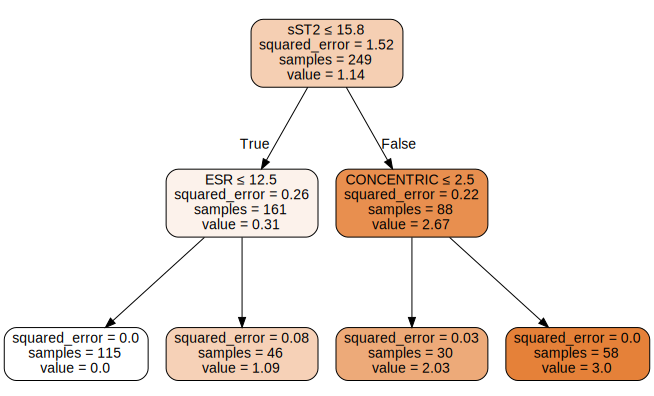

In [69]:
from fastbook import *

draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)


In [72]:
def rf(xs, y, n_estimators=40, max_samples=249,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [73]:
m = rf(xs, y);


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [74]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [75]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
50,sST2,0.444459
8,CRP,0.228155
23,LA,0.100668
39,ESR,0.069760
1,CONCENTRIC,0.054083
18,JOINT PAIN,0.038524
19,PALPITATION,0.020487
38,ASO,0.012486
16,SORE THROAT,0.011201
20,GIDDINESS,0.007262


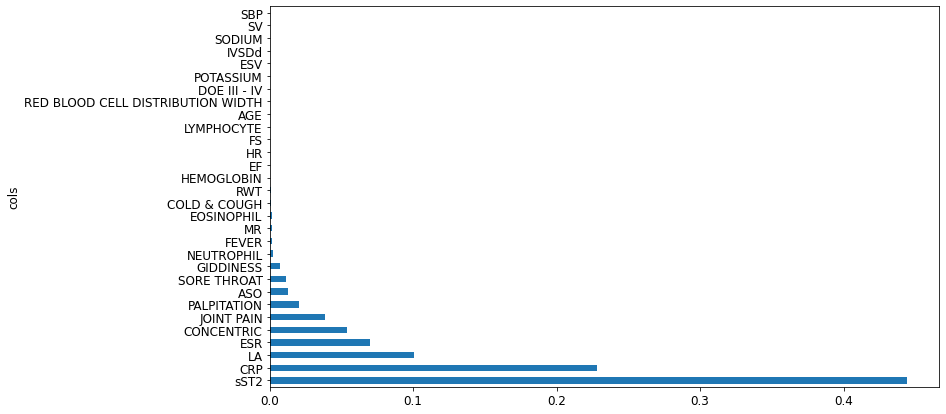

In [76]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);